<div style="display:flex">

<div>

<h1 style="font-weight:bold">Nepali Movies</h1>

<p style="line-height:2">
Nepali cinema, also known as Kollywood, features a dynamic mix of traditional and modern narratives framed by Nepal's rich cultural and scenic diversity. This dataset includes 800 Nepali movies, gathered through IMDB website scraping.
</p><br>

<span style="font-weight: bold; font-size: 18px;">Column</span><br>

<ol style="line-height:2">
    <li><b>Title :</b> Name of the movie<br></li>
    <li><b>Genre :</b> Genre of the movie<br></li>
    <li><b>Year :</b> Release date of the movie<br></li>
    <li><b>Runtime :</b> Duration of the movie (in seconds)<br></li>
    <li><b>Rating :</b> Rating of the movie<br></li>
    <li><b>Votes :</b> Number of votes<br></li>
    <li><b>Plot :</b> Summary of the movie<br></li>
    <li><b>Imdb_url : </b> URL of the movie on IMDB<br></li>
</ol><br>

<a href="https://github.com/NISH1001/nepalimdb" target="_blank">Dataset by NISH1001/Nepalimdb</a>

</div>

<div style="display:flex;  justify-content: center; align-items: center; padding:20px; height: 80%">
<img src="https://blog.daraz.com.np/wp-content/uploads/2021/08/must-watch-nepali-movie.jpg"/>
</div>

</div>

----

### Import relevant libraries

In [1]:
import os
import pandas as pd

### Load the movie dataset

In [2]:
# Get the base directory of the project
base_dir = os.path.dirname(os.path.realpath('__file__'))

# Load the csv data into a pandas dataframe
movies = pd.read_csv(os.path.join(base_dir, 'movies.csv'))

### Basic Data Inspection

In [3]:
# Check the shape of the dataframe
print(movies.shape)
print("The number of rows/movies in the dataframe is: ", movies.shape[0])
print("The number of columns in the dataframe is: ", movies.shape[1])

(800, 8)
The number of rows/movies in the dataframe is:  800
The number of columns in the dataframe is:  8


In [4]:
# Get basic information about the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     800 non-null    object 
 1   genre     723 non-null    object 
 2   year      764 non-null    float64
 3   runtime   384 non-null    float64
 4   rating    259 non-null    float64
 5   votes     259 non-null    float64
 6   plot      800 non-null    object 
 7   imdb_url  800 non-null    object 
dtypes: float64(4), object(4)
memory usage: 50.1+ KB


In [5]:
# Display the first few rows of the dataframe
movies.head()

,title,genre,year,runtime,rating,votes,plot,imdb_url
0,Chhakka Panja 2,"Comedy, Drama",2017.0,8280.0,6.6,290.0,Chhakka Panja 2 continues with new story of Ra...,https://www.imdb.com/title/tt7229666/
1,Chhakka Panja 3,Comedy,2018.0,NaN,6.3,96.0,When she learns about the worst condition of t...,https://www.imdb.com/title/tt8393764/
2,Intu Mintu Londonma,Romance,2018.0,7200.0,7.3,71.0,When Ishan (Dhiraj Magar) and Meera (Samragyee...,https://www.imdb.com/title/tt7672868/
3,Kabaddi Kabaddi Kabaddi,"Comedy, Drama, Romance",2019.0,NaN,8.6,9.0,Add a Plot,https://www.imdb.com/title/tt10942220/
4,Captain,"Drama, Sport",2019.0,NaN,3.2,46.0,Father's dedication to guiding his son to beco...,https://www.imdb.com/title/tt8387542/


In [6]:
# Display the last few rows of the dataframe
movies.tail()

,title,genre,year,runtime,rating,votes,plot,imdb_url
795,Pokhara.com,Musical,2003.0,1800.0,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/
796,Pokhara.com,Musical,2003.0,1800.0,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/
797,Pokhara.com,Musical,2003.0,1800.0,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/
798,Pokhara.com,Musical,2003.0,NaN,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/
799,Herne Katha,"Documentary, Short",2018.0,NaN,NaN,NaN,"Zubaida Khatun, like most of her friends got m...",https://www.imdb.com/title/tt8103440/


----

### Data Cleaning

Duplicated Values

In [7]:
# Check for duplicate rows in the dataframe
print("Number of duplicate rows in the dataframe: ", movies.duplicated().sum())

# Display the duplicate rows ( showing all duplicates)
movies[movies.duplicated(keep=False)]

Number of duplicate rows in the dataframe:  2


,title,genre,year,runtime,rating,votes,plot,imdb_url
795,Pokhara.com,Musical,2003.0,1800.0,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/
796,Pokhara.com,Musical,2003.0,1800.0,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/
797,Pokhara.com,Musical,2003.0,1800.0,NaN,NaN,Add a Plot,https://www.imdb.com/title/tt2144066/


In [8]:
# Remove duplicate rows from the dataframe
movies = movies.drop_duplicates()

# Check the shape of the cleaned dataframe
print("The number of rows/movies in the dataframe is: ", movies.shape[0])
print("The number of columns in the dataframe is: ", movies.shape[1])

The number of rows/movies in the dataframe is:  798
The number of columns in the dataframe is:  8


Empty values

In [9]:
# Check for any missing values
movies.isnull().sum()

title         0
genre        77
year         36
runtime     416
rating      539
votes       539
plot          0
imdb_url      0
dtype: int64

In [10]:
# Drop rows with missing information in the columns rating, votes and runtime
movies.dropna(inplace=True, subset=['rating', 'votes', 'runtime'])

# Check the shape of the cleaned dataframe
print("The number of rows/movies in the dataframe is: ", movies.shape[0])
print("The number of columns in the dataframe is: ", movies.shape[1])

# Check for any missing values
movies.isnull().sum()

The number of rows/movies in the dataframe is:  149
The number of columns in the dataframe is:  8


title       0
genre       1
year        0
runtime     0
rating      0
votes       0
plot        0
imdb_url    0
dtype: int64

Update Data Types & Values

In [11]:
# Update the data type to integer
movies['year'] = movies['year'].astype(int)
movies['runtime'] = movies['runtime'].astype(int)
movies['votes'] = movies['votes'].astype(int)

# Display the dataset
movies

,title,genre,year,runtime,rating,votes,plot,imdb_url
0,Chhakka Panja 2,"Comedy, Drama",2017,8280,6.6,290,Chhakka Panja 2 continues with new story of Ra...,https://www.imdb.com/title/tt7229666/
2,Intu Mintu Londonma,Romance,2018,7200,7.3,71,When Ishan (Dhiraj Magar) and Meera (Samragyee...,https://www.imdb.com/title/tt7672868/
5,Bulbul,Drama,2019,5700,7.1,18,A young mother waiting for her husband to be b...,https://www.imdb.com/title/tt8622286/
6,Kabaddi Kabaddi,"Comedy, Drama",2015,8100,7.9,343,Kaji dreams of marrying Maiya but things go wr...,https://www.imdb.com/title/tt5225580/
7,Nai Nabhannu La 2,Romance,2014,8520,6.9,7,Add a Plot,https://www.imdb.com/title/tt8677256/
...,...,...,...,...,...,...,...,...
631,Samaya Ra Paristhiti,Short,2014,360,7.3,6,How often do we come to terms with ourselves? ...,https://www.imdb.com/title/tt4899194/
637,Riingata,"Documentary, Drama",2015,7020,8.4,7,"Set in Northern Nepal, during the climax of th...",https://www.imdb.com/title/tt5178620/
648,The Last Evening on Earth,"Short, Drama, Sci-Fi",2015,180,6.5,6,A man who is back from space visits his grand ...,https://www.imdb.com/title/tt4810692/
697,Mustang Secrets Beyond the Himalayas,Documentary,2009,5400,8.5,12,A traveler sets on a journey into the remote m...,https://www.imdb.com/title/tt1543542/


In [12]:
# Check for any default values in the plot column
movies['plot'].value_counts()

plot
Add a Plot                                                                                                                                                                                                                                                                        12
Chhakka Panja 2 continues with new story of Raja and his friend at the village.                                                                                                                                                                                                    1
When Heera (Nisha Adhikari) goes missing and Police Inspector Rai (Dayahang Rai) is having difficulties in discovering her whereabouts. he then hires village girls Pushpa (Priyanka Karki) and Ramita (Keki Adhikari) in hopes he might solve the case with their assistance.     1
Set in the early 2000s, Uma is a story about Uma, her brother Milan and their widow mother living in rural Nepal during the Maoist insurgency.                      

In [13]:
# Replace "Add plot" with an empty string
movies['plot'] = movies['plot'].replace('plot', '')
movies['plot'] = movies['plot'].replace('Add plot', '')

----

### Descriptive Statistics


In [14]:
# Get descriptive statistics for numeric columns
movies.describe()

,year,runtime,rating,votes
count,149.000000,149.000000,149.000000,149.000000
mean,2011.966443,6215.838926,7.475839,62.677852
std,7.812340,2752.630462,1.048206,118.175046
min,1966.000000,180.000000,3.300000,1.000000
25%,2011.000000,5280.000000,6.800000,9.000000
50%,2014.000000,7500.000000,7.500000,20.000000
75%,2016.000000,8280.000000,8.200000,52.000000
max,2019.000000,9840.000000,10.000000,746.000000


---

### Data Analysis

<b>Question 1:</b> What are the top 10 most popular genres in Nepali movies?

In [15]:
# Count of movies based on genre
movies[movies.genre.notna()].genre.apply(lambda x: [y.strip() for y in x.split(',')]).explode().value_counts().head(10)

genre
Drama          108
Romance         39
Comedy          24
Short           24
Documentary     15
Action          13
Family           9
Crime            8
Music            6
Mystery          6
Name: count, dtype: int64

<b>Question 2:</b> What is the top 10 highest-rated Nepali movies?

In [16]:
# Top 10 movies with the highest rating
movies.sort_values(by='rating', ascending=False).head(10)

,title,genre,year,runtime,rating,votes,plot,imdb_url
364,1 Percent,"Short, Drama",2012,2280,10.0,7,"2015, illegal and uncontrolled sex-trade is le...",https://www.imdb.com/title/tt2298942/
486,Ma Byujiyepachi,"Short, Family",2015,180,9.6,17,Add a Plot,https://www.imdb.com/title/tt4567392/
224,Singha Durbar,"Short, Drama",2016,900,9.5,8,An injured activist travels to meet his party'...,https://www.imdb.com/title/tt6303042/
134,Sunakali,"Documentary, Family, Musical",2017,3540,9.3,19,This is the story of the rise of a women's foo...,https://www.imdb.com/title/tt3856476/
94,Videos,"Documentary, Short, Drama",2012,420,9.2,6,This film 'AFFECTS' is about the effects for c...,https://www.imdb.com/title/tt2361994/
140,Kafal pakyo,"Short, Drama",2014,1020,9.1,21,"Sushma Devi mother of two sons, whose husband ...",https://www.imdb.com/title/tt4208620/
119,Taandro,"Action, Drama",2015,6720,9.1,26,A member of ultra-leftist underground group is...,https://www.imdb.com/title/tt5252250/
775,Secrets of Dhaulagiri,"Documentary, Short",2011,1800,9.0,8,This is a widely appreciated documentary form ...,https://www.imdb.com/title/tt2141925/
249,Drawing the Tiger,"Documentary, Drama",2015,5760,9.0,5,"Filmed over seven years, Drawing The Tiger is ...",https://www.imdb.com/title/tt4599430/
167,Damaruko Dandibiyo,"Drama, Sport",2018,8280,8.9,35,Damaru comes back to his village to revive Dan...,https://www.imdb.com/title/tt7971388/


<b>Question 3:</b> What is the top 10 highest-rated Nepali movies with more than 200 votes?

In [17]:
# Top 10 movies with the highest rating and votes with more than 200 votes
movies[movies.votes > 200].sort_values(by=['rating', 'votes'], ascending=False).head(10)

,title,genre,year,runtime,rating,votes,plot,imdb_url
65,Talakjung vs Tulke,"Action, Drama",2014,7980,8.2,465,Tulké is a day-laborer in a Nepalese mountain ...,https://www.imdb.com/title/tt3342558/
20,Kabaddi,"Comedy, Drama, Romance",2014,7380,8.2,434,Kazi a young aimless man dreams of marrying Ma...,https://www.imdb.com/title/tt3696800/
47,Loot,"Crime, Drama, Thriller",2012,8280,8.1,746,A man with a 'master plan' to rob a bank searc...,https://www.imdb.com/title/tt2179133/
6,Kabaddi Kabaddi,"Comedy, Drama",2015,8100,7.9,343,Kaji dreams of marrying Maiya but things go wr...,https://www.imdb.com/title/tt5225580/
12,Jhola,"Drama, History",2013,5400,7.7,249,"After her husband's death, a girl is forced to...",https://www.imdb.com/title/tt3700482/
75,Kagbeni,"Drama, Horror",2008,7800,7.3,426,Old friends Krishna and Ramesh meet after ages...,https://www.imdb.com/title/tt1729652/
17,Kalo Pothi,"Action, Drama, History",2015,5400,7.2,466,"They are bonded, nonetheless, by friendship an...",https://www.imdb.com/title/tt4991660/
16,Seto Surya,"Adventure, Drama",2016,5340,7.1,397,Anti-regime partisan Chandra confronts physica...,https://www.imdb.com/title/tt3638644/
88,Sano Sansar,"Comedy, Romance",2008,8640,7.1,253,Ravi and Reetu are good chat friends but they ...,https://www.imdb.com/title/tt2007994/
68,Manakamana,Documentary,2013,7080,6.6,650,A documentary about a group of pilgrims who tr...,https://www.imdb.com/title/tt3103326/


<b>Question 4</b> Are there more movies released in recent years?

<Axes: xlabel='year'>

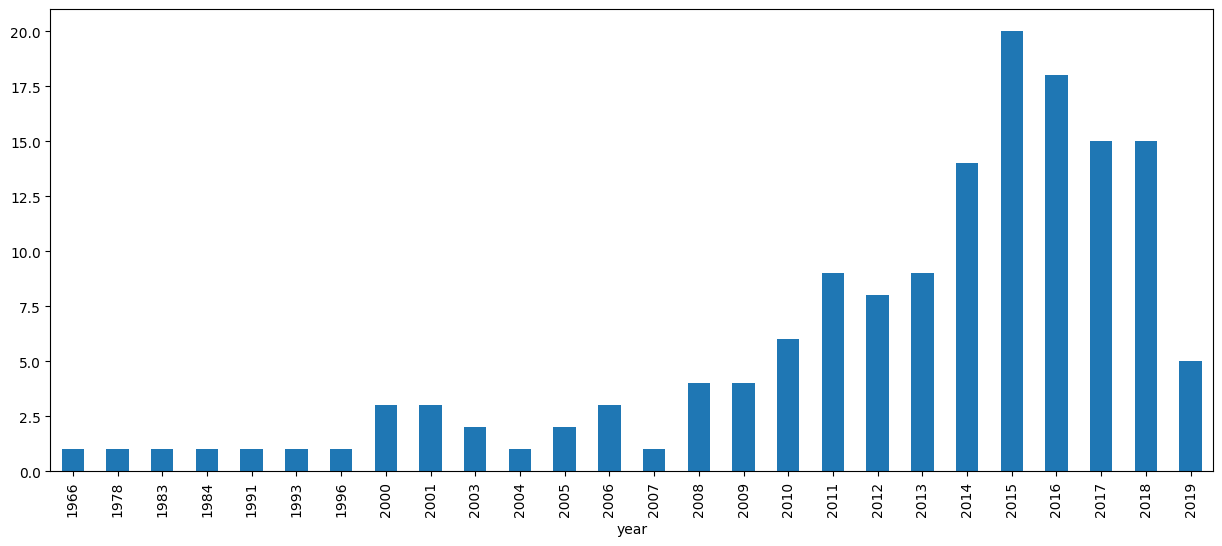

In [18]:
# Count of movies based on year
movies.year.value_counts().sort_index().plot(kind='bar', figsize=(15, 6))

<b>Question 5</b> Has the quality of the movies improved over the years?

<Axes: xlabel='year'>

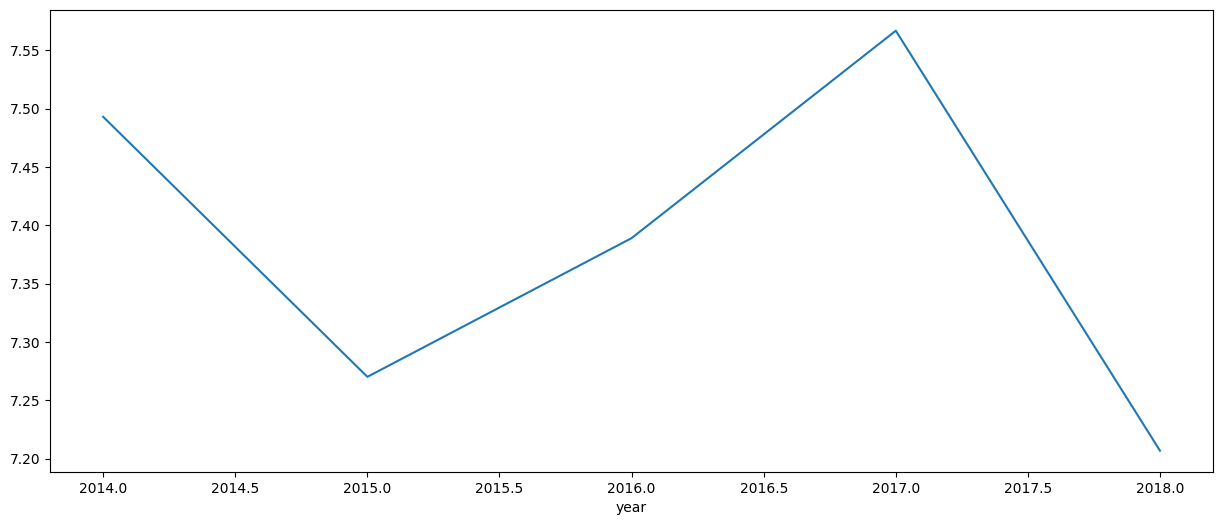

In [19]:
# Get the number of movies released per year
moves_per_year = movies.year.value_counts()
# Get the years with more than 10 movies
over_10_movies_per_year = moves_per_year[moves_per_year > 10].index

# Get the average rating of movies released per year
movies[movies.year.isin(over_10_movies_per_year)].groupby('year')['rating'].mean().plot(kind='line', figsize=(15, 6))